In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install imutils

  Using cached imutils-0.5.4.tar.gz (17 kB)
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=166f19738b2e49f5f4ce40849d200b6376655a30138ab4535cf23555261f5107
  Stored in directory: c:\users\edwar\appdata\local\pip\cache\wheels\86\d7\0a\4923351ed1cec5d5e24c1eaf8905567b02a0343b24aa873df2
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pandas

  Using cached pytz-2021.1-py2.py3-none-any.whl (510 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install Keras

  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install matplotlib

  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install seaborn

  Using cached seaborn-0.11.1-py3-none-any.whl (285 kB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install scikit-learn

  Using cached joblib-1.0.0-py3-none-any.whl (302 kB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install tensorflow

  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.2
    Uninstalling scipy-1.5.2:
      Successfully uninstalled scipy-1.5.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\edwar\\anaconda3\\envs\\tensorflow\\lib\\site-packages\\~cipy\\fft\\_pocketfft\\pypocketfft.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [16]:
pip install keras==2.3.1

  Attempting uninstall: keras
    Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import random 
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
import keras
from keras.utils import np_utils
from keras.models import Model, Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

np.random.seed(123)

Using TensorFlow backend.


In [11]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs available:  1


In [2]:
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Tensor Flow Version: 2.1.0
Keras Version: 2.2.4-tf

Python 3.7.9 (default, Aug 31 2020, 17:10:11) [MSC v.1916 64 bit (AMD64)]
Pandas 1.2.1
Scikit-Learn 0.24.1
GPU is available


In [3]:
train_dir = 'dataset/handwritten_character/Train'
val_dir = 'dataset/handwritten_character/Validation'

idg = ImageDataGenerator(rescale=1./255)

train_generator = idg.flow_from_directory(train_dir, color_mode = 'grayscale',
                                         target_size=(32, 32),
                                         batch_size = 32,
                                         class_mode ='categorical')

valid_generator = idg.flow_from_directory(val_dir, color_mode = 'grayscale',
                                         target_size=(32, 32),
                                         batch_size = 32,
                                         class_mode ='categorical')

train_images, train_labels = next(train_generator)
val_images, val_labels = next(valid_generator)

Found 834036 images belonging to 39 classes.
Found 22524 images belonging to 39 classes.


In [5]:
train_images.shape

(32, 32, 32, 1)

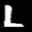

In [6]:
array_to_img(train_images[0])

In [7]:
#plot more images her letters to visualize

In [8]:
# restnet = ResNet50(include_top=False, weights='imagenet')

In [9]:
# output = restnet.layers[-1].output
# output= keras.layers.Flatten()(output)

In [10]:
# restnet = Model(restnet.input, output=output)

In [11]:
model_1 = Sequential()

model_1.add(Conv2D(32, (3, 3), padding = 'same', activation='relu', input_shape=(32, 32, 1)))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Conv2D(64, (3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Conv2D(128, (3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(.025))

model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(39, activation='softmax'))

In [12]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 2, 128)        

In [13]:
model_1.compile(loss = 'categorical_crossentropy',
             optimizer='adam',
             metrics = ['accuracy'])

In [15]:
np.random.seed(123)
results_1 = model_1.fit(train_generator, epochs=50, validation_data=valid_generator, verbose=1)

Epoch 1/50
26064/26064 [==============================] - 519s 20ms/step - loss: 0.2561 - accuracy: 0.9182 - val_loss: 0.0576 - val_accuracy: 0.9389
Epoch 2/50
26064/26064 [==============================] - 424s 16ms/step - loss: 0.1759 - accuracy: 0.9415 - val_loss: 0.0874 - val_accuracy: 0.9397
Epoch 3/50
26064/26064 [==============================] - 417s 16ms/step - loss: 0.1649 - accuracy: 0.9445 - val_loss: 0.0760 - val_accuracy: 0.9467
Epoch 4/50
26064/26064 [==============================] - 414s 16ms/step - loss: 0.1596 - accuracy: 0.9462 - val_loss: 0.3243 - val_accuracy: 0.9489
Epoch 5/50
26064/26064 [==============================] - 424s 16ms/step - loss: 0.1565 - accuracy: 0.9473 - val_loss: 0.0261 - val_accuracy: 0.9512: 0.1561 - accuracy: - ETA: 26s - loss: 0.1561 - ETA:  - ETA: 0s - loss: 0
Epoch 6/50
26064/26064 [==============================] - 414s 16ms/step - loss: 0.1549 - accuracy: 0.9475 - val_loss: 0.0299 - val_accuracy: 0.9488s - loss: - ETA: 0s -
Epoch 7/50


26064/26064 [==============================] - 433s 17ms/step - loss: 0.1950 - accuracy: 0.9393 - val_loss: 0.2359 - val_accuracy: 0.9351
Epoch 48/50
26064/26064 [==============================] - 427s 16ms/step - loss: 0.1905 - accuracy: 0.9401 - val_loss: 0.2072 - val_accuracy: 0.9454
Epoch 49/50
26064/26064 [==============================] - 426s 16ms/step - loss: 0.1911 - accuracy: 0.9399 - val_loss: 0.3298 - val_accuracy: 0.9425
Epoch 50/50
26064/26064 [==============================] - 423s 16ms/step - loss: 0.1909 - accuracy: 0.9399 - val_loss: 0.2982 - val_accuracy: 0.9436


In [17]:
results_1.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [20]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

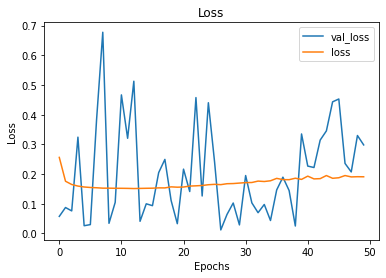

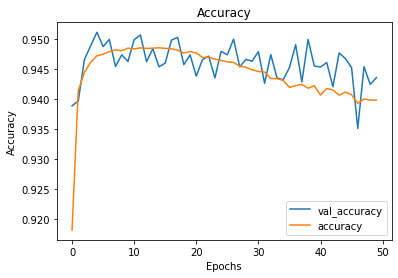

In [21]:
visualize_training_results(results_1)